In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#nltk.download('stopwords')
#nltk.download('punkt')

In [2]:
df = pd.read_csv("Dataset/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1');
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
essay_id          12976 non-null int64
essay_set         12976 non-null int64
essay             12976 non-null object
rater1_domain1    12976 non-null int64
rater2_domain1    12976 non-null int64
rater3_domain1    128 non-null float64
domain1_score     12976 non-null int64
rater1_domain2    1800 non-null float64
rater2_domain2    1800 non-null float64
domain2_score     1800 non-null float64
rater1_trait1     2292 non-null float64
rater1_trait2     2292 non-null float64
rater1_trait3     2292 non-null float64
rater1_trait4     2292 non-null float64
rater1_trait5     723 non-null float64
rater1_trait6     723 non-null float64
rater2_trait1     2292 non-null float64
rater2_trait2     2292 non-null float64
rater2_trait3     2292 non-null float64
rater2_trait4     2292 non-null float64
rater2_trait5     723 non-null float64
rater2_trait6     723 non-null float64
rater3_trait1     128

In [5]:
df.shape

(12976, 28)

In [6]:
df.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [70]:
df[df['essay_set']==7]

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
10684,17834,7,Patience is when your waiting .I was patience ...,8,7,NaN,15,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10685,17836,7,"I am not a patience person, like I cant sit i...",6,7,NaN,13,NaN,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10686,17837,7,One day I was at basketball practice and I was...,7,8,NaN,15,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10687,17838,7,I going to write about a time when I went to t...,8,9,NaN,17,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10688,17839,7,It can be very hard for somebody to be patient...,7,6,NaN,13,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10689,17840,7,There was a girl name @PERSON1. She loved spen...,11,12,NaN,23,NaN,NaN,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10690,17841,7,Un Patience @CAPS1. My name is @CAPS2 and I ...,8,8,NaN,16,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10691,17842,7,A time when I was patient was when I preordere...,9,9,NaN,18,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10692,17843,7,One time I was patience it was when I wanted a...,8,4,NaN,12,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10693,17844,7,I think patience is a time when you have to be...,4,6,NaN,10,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dropna(axis=1,inplace=True)

In [8]:
df.shape

(12976, 6)

In [9]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [10]:
df['essay_set'].value_counts()

5    1805
6    1800
2    1800
1    1783
4    1770
3    1726
7    1569
8     723
Name: essay_set, dtype: int64

In [11]:
df.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)

In [12]:
df.shape

(12976, 4)

In [13]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


In [14]:
min(df['domain1_score'])

0

In [15]:
max(df['domain1_score'])

60

In [16]:
df.skew()

essay_id         0.044368
essay_set        0.067896
domain1_score    2.475881
dtype: float64

In [17]:
df.kurtosis()

essay_id        -1.174375
essay_set       -1.151431
domain1_score    6.077899
dtype: float64

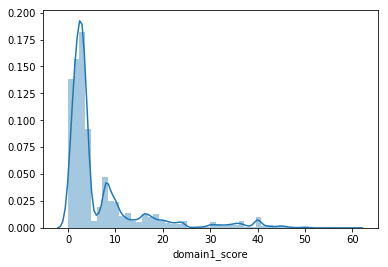

In [18]:
#Check Skewness
sns.distplot(df['domain1_score'])

In [19]:
df[df['essay_set']==2]['domain1_score']

1783    4
1784    1
1785    2
1786    4
1787    4
1788    4
1789    5
1790    2
1791    4
1792    4
1793    3
1794    3
1795    5
1796    3
1797    3
1798    3
1799    4
1800    3
1801    1
1802    3
1803    3
1804    3
1805    3
1806    4
1807    3
1808    4
1809    4
1810    2
1811    3
1812    3
       ..
3553    2
3554    3
3555    2
3556    4
3557    4
3558    4
3559    5
3560    4
3561    4
3562    4
3563    4
3564    3
3565    3
3566    3
3567    4
3568    3
3569    4
3570    4
3571    5
3572    3
3573    3
3574    3
3575    5
3576    4
3577    3
3578    3
3579    3
3580    2
3581    3
3582    3
Name: domain1_score, Length: 1800, dtype: int64

In [20]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    #print("Before Normalization: "+str(x))
    x = (x-mi)/(ma-mi)
    #print("After Normalization : "+str(x))
    return round(x*10)

df['final_score']=df.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

In [21]:
df['final_score']

0         6
1         7
2         5
3         8
4         6
5         6
6         8
7         8
8         7
9         7
10        6
11        6
12        5
13        4
14        4
15       10
16        6
17        6
18        2
19        4
20        6
21        1
22        8
23        9
24        6
25        7
26        2
27        7
28        7
29        6
         ..
12946     7
12947     5
12948     6
12949     5
12950     5
12951     8
12952     7
12953     6
12954     6
12955     6
12956     6
12957     8
12958     7
12959     7
12960     7
12961     7
12962     7
12963     5
12964     6
12965     7
12966     2
12967     6
12968     7
12969     6
12970     5
12971     6
12972     5
12973     7
12974     7
12975     7
Name: final_score, Length: 12976, dtype: int64

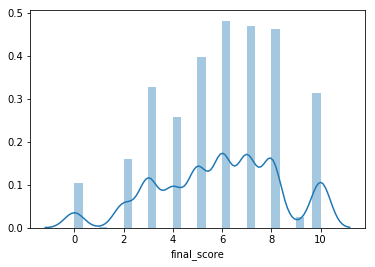

In [22]:
sns.distplot(df['final_score'])

In [23]:
df.skew()

essay_id         0.044368
essay_set        0.067896
domain1_score    2.475881
final_score     -0.248956
dtype: float64

In [24]:
df.head()

,essay_id,essay_set,essay,domain1_score,final_score
0,1,1,"Dear local newspaper, I think effects computer...",8,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6


In [25]:
df.describe()

,essay_id,essay_set,domain1_score,final_score
count,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,6.800247,5.849877
std,6309.074105,2.136913,8.970705,2.466040
min,1.000000,1.000000,0.000000,0.000000
25%,4438.750000,2.000000,2.000000,4.000000
50%,10044.500000,4.000000,3.000000,6.000000
75%,15681.250000,6.000000,8.000000,8.000000
max,21633.000000,8.000000,60.000000,10.000000


In [26]:
df.drop('domain1_score',axis=1,inplace=True)

In [27]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,1,"Dear local newspaper, I think effects computer...",6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",8
4,5,1,"Dear @LOCATION1, I know having computers has a...",6


**PRE_PROCESSING**

In [28]:
def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x:clean_essay(x))

In [29]:
stop_words = set(stopwords.words('english')) 
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x:remove_stop_words(x))

In [30]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]","",essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x:remove_puncs(x))

In [31]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...


In [32]:
def sent2word(x):
    x=re.sub("[^A-Za-z0-9]"," ",x)
    words=nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sent2word(i))
    return final_words
        

def noOfWords(essay):
    count=0
    for i in essay2word(essay):
        count=count+len(i)
    return count

def noOfChar(essay):
    count=0
    for i in essay2word(essay):
        for j in i:
            count=count+len(j)
    return count

def avg_word_len(essay):
    return noOfChar(essay)/noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count=0
    adj_count=0
    verb_count=0
    adverb_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='N'):
                noun_count+=1
            elif(pos_tag[0]=='V'):
                verb_count+=1
            elif(pos_tag[0]=='J'):
                adj_count+=1
            elif(pos_tag[0]=='R'):
                adverb_count+=1
    return noun_count,verb_count,adj_count,adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count+=1
    return count
    
    

In [56]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...


**Prep for ML**

In [48]:
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(df['clean_essay'])
feature_names = vectorizer.get_feature_names()
data = df[['essay_set','clean_essay','final_score']].copy()
X = count_vectors.toarray()
y = data['final_score'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Machine Learning ALGO's without Pre-processing steps**

Linear Regression

In [100]:
#Save Trained Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
pickle.dump(linear_regressor,open("Saved_Models/LR_without_pp",'wb'))

#Use Saved Model
model = pickle.load(open("Saved_Models/LR_without_pp",'rb'))
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 2303083418693883.50


Since linear regression is giving really bad results, we move on to models which do not map the features linearly like Support Vector Machines or Random Forests 

SVR

In [101]:
#Save Trained Model
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
pickle.dump(clf,open("Saved_Models/SVR_without_pp",'wb'))

#Use Saved Model
clf = pickle.load(open('Saved_Models/SVR_without_pp', 'rb'))
y_pred=clf.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

C:\Users\sankalp\.conda\envs\nlp_final\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Mean squared error:3.68


Random Forest

In [102]:
#Save Trained Model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
pickle.dump(rf, open('Saved_Models/RF_without_PP', 'wb'))

#Use Saved Model
rf = pickle.load(open('Saved_Models/RF_without_PP', 'rb'))
predictions = rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 3.68


**Machine Learning ALGO's with Pre-processing steps**

In [ ]:
pro_data = df.copy()
pro_data['char_count'] = pro_data['essay'].apply(noOfChar)
pro_data['word_count'] = pro_data['essay'].apply(noOfWords)
pro_data['sent_count'] = pro_data['essay'].apply(noOfSent)
pro_data['avg_word_len'] = pro_data['essay'].apply(avg_word_len)
pro_data['spell_err_count'] = pro_data['essay'].apply(check_spell_error)
pro_data['noun_count'], pro_data['adj_count'], pro_data['verb_count'], pro_data['adv_count'] = zip(*pro_data['essay'].map(count_pos))
pro_data.to_csv("Processed_data.csv")

In [2]:
prep_df = pd.read_csv("Processed_data.csv")
prep_df.drop('Unnamed: 0',inplace=True,axis=1)
prep_df.head()

,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...,1441,344,16,4.188953,11,76,75,18,24
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...,1765,413,17,4.273608,21,98,84,20,19
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...,1185,276,14,4.293478,5,76,51,20,16
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...,2284,490,26,4.661224,31,142,96,39,29
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...,2023,469,30,4.313433,18,110,90,32,36


In [3]:
prep_df.shape

(12976, 14)

In [4]:
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
feature_names = vectorizer.get_feature_names()
X = count_vectors.toarray()
X_full = np.concatenate((prep_df.iloc[:, 5:].as_matrix(), X), axis = 1)
y_full = prep_df['final_score'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.3)

C:\Users\sankalp\.conda\envs\nlp_final\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\sankalp\.conda\envs\nlp_final\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Linear Regression

In [126]:
#Save Trained Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
pickle.dump(linear_regressor,open("Saved_Models/LR_with_pp",'wb'))

#Use Saved Model
model = pickle.load(open("Saved_Models/LR_with_pp",'rb'))
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 88544324431.36


SVR

In [9]:
#Save Trained Model
# clf = SVR(C=1.0, epsilon=0.2)
# clf.fit(X_train, y_train)
# pickle.dump(clf,open("Saved_Models/SVR_with_pp",'wb'))

#Use Saved Model
clf = pickle.load(open('Saved_Models/SVR_with_pp', 'rb'))
y_pred=clf.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

Mean squared error:2.83


Random Forest

In [13]:
#Save Trained Model
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# rf.fit(X_train, y_train)
# pickle.dump(rf, open('Saved_Models/RF_with_PP', 'wb'))

#Use Saved Model
rf = pickle.load(open('Saved_Models/RF_wth_pp', 'rb'))
y_pred = rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.88


In [16]:
y_pred

array([5.628, 2.061, 2.635, ..., 3.053, 4.164, 2.895])